In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.interpolate import interp1d
from scipy.integrate import quad

In [2]:
import plt_conf as conf 
conf.general()
# conf.latex()

In [3]:
# cargando datos
xN, sN, uN, enVec = np.loadtxt('BackgroundData_ell_1.dat', unpack=True)
xN0, sN0, uN0, enVec0 = np.loadtxt('BackgroundData_ell_0.dat', unpack=True)
xN2, sN2, uN2, enVec2 = np.loadtxt('BackgroundData_ell_2.dat', unpack=True)
xN3, sN3, uN3, enVec3 = np.loadtxt('BackgroundData_ell_3.dat', unpack=True)

/var/folders/m_/bkm6rtjj0f104l91yr9n6t2c0000gn/T/ipykernel_35643/3680029462.py:6: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(5, 7),


Text(42, -0.75, '$E^{phys}_{\\ell=1}=-0.487 \\,\\left[N^3 \\mu\\, v_c^2\\right]$')

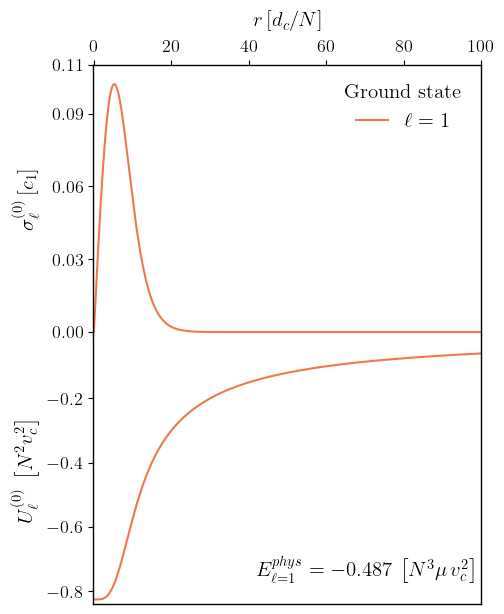

In [6]:
ell=1

col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f', '#bc92e0', '#486318', '#ed5b0c', 
      '#f0a092', '#484f07', '#694d0c']

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(5, 7),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0, wspace=0) # espacio vertical y horizontal entre los subplots
                      ) 

ax[0].plot(xN, sN, ls='-', lw=1.5, c=col[ell], label=r'$\ell=%2d$'%ell)

ax[0].legend(frameon=False, title=r'Ground state', ncol=2, columnspacing=1.2, title_fontsize=15)
ax[0].set_ylabel(r'$\sigma^{(0)}_{\ell}\,[c_1]$', labelpad=10)

####

ax[1].plot(xN, enVec[0]-2*uN, ls='-', lw=1.5, c=col[ell], label=r'$\ell=%2d$'%ell) 

#ax[1].legend(frameon=False, title=r'ground states')
ax[1].set_ylabel(r'$U^{(0)}_{\ell} \;\left[N^2 v_c^2\right]$', labelpad=6)

######
ax[0].set_xlabel(r'$r\,[d_c/N]$', labelpad=10)
ax[0].xaxis.set_label_position('top') 

ax[0].set_ylim(-0.001, 0.11)
ax[1].set_ylim(-0.84, -0.001)

ax[0].set_xlim(-0.1, 100)
ax[1].set_xlim(-0.1, 100)
ax[1].set_xticks([])
ax[0].xaxis.tick_top()

ax[0].spines[['bottom']].set_visible(False)
ax[1].spines[['top']].set_visible(False)

ax[0].set_yticks([0.0, 0.03, 0.06, 0.09, 0.11])
ax[1].set_yticks([-0.8, -0.6, -0.4, -0.2])

ax[1].text(x=42, y=-0.75, s=r'$E^{phys}_{\ell=%d}=%5.3f \,\left[N^3 \mu\, v_c^2\right]$'%(ell, enVec[0]), fontsize=15)

In [7]:
#plt.gca().set_axis_off()
#plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
#            hspace = 0, wspace = 0)
#plt.margins(0,0)
#plt.gca().xaxis.set_major_locator(plt.NullLocator())
#plt.gca().yaxis.set_major_locator(plt.NullLocator())
#plt.savefig("filename.pdf", bbox_inches = 'tight',
#    pad_inches = 0)

fig.savefig('Fig1.eps', format='eps', #metadata=None, # dpi='figure',
        pad_inches=0.03 , #0.1,
        facecolor='auto', edgecolor='auto',
        backend=None, dpi=1000, 
        bbox_inches='tight'# Plot will be occupy a maximum of available space # bbox_inches=None,
       )

/var/folders/m_/bkm6rtjj0f104l91yr9n6t2c0000gn/T/ipykernel_35643/2425908610.py:10: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(5, 7),


Text(42, -1.2, '$E^{phys}_{\\ell=3}=-0.799 \\,\\left[N^3\\mu\\, v_c^2\\right]$')

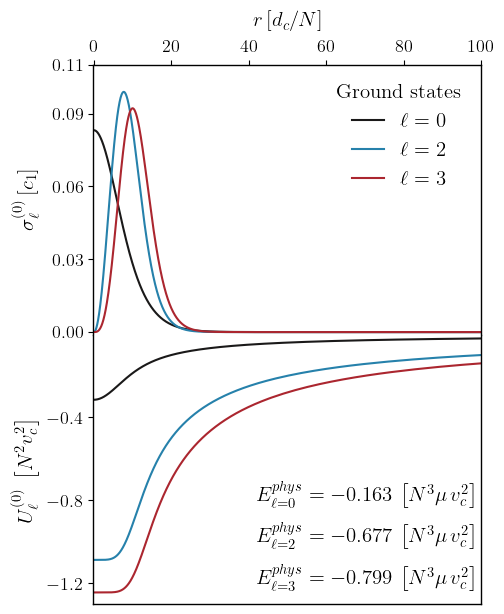

In [8]:
ellD = [0, 2, 3]
xND = [xN0, xN2, xN3]
sND = [sN0, sN2, sN3]
enVecD = [enVec0[0], enVec2[0], enVec3[0]]
uND = [uN0, uN2, uN3]

col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f', '#bc92e0', '#486318', '#ed5b0c', 
      '#f0a092', '#484f07', '#694d0c']

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(5, 7),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0, wspace=0) # espacio vertical y horizontal entre los subplots
                      ) 

for i in range(3):
    ax[0].plot(xND[i], sND[i], ls='-', lw=1.5, c=col[ellD[i]], label=r'$\ell=%2d$'%ellD[i])

ax[0].legend(frameon=False, title=r'Ground states', ncol=1, columnspacing=1.2, title_fontsize=15)
ax[0].set_ylabel(r'$\sigma^{(0)}_{\ell}\,[c_1]$', labelpad=10)

####

for i in range(3):
     ax[1].plot(xND[i], enVecD[i]-2*uND[i], ls='-', lw=1.5, c=col[ellD[i]], label=r'$\ell=%2d$'%ellD[i]) 

#ax[1].legend(frameon=False, title=r'ground states')
ax[1].set_ylabel(r'$U^{(0)}_{\ell} \;\left[N^2 v_c^2\right]$', labelpad=6)

######
ax[0].set_xlabel(r'$r\,[d_c/N]$', labelpad=10)
ax[0].xaxis.set_label_position('top') 

ax[0].set_ylim(-0.001, 0.11)
ax[1].set_ylim(-1.3, -0.001)

ax[0].set_xlim(-0.1, 100)
ax[1].set_xlim(-0.1, 100)
ax[1].set_xticks([])
ax[0].xaxis.tick_top()

ax[0].spines[['bottom']].set_visible(False)
ax[1].spines[['top']].set_visible(False)

ax[0].set_yticks([0.0, 0.03, 0.06, 0.09, 0.11]);
ax[1].set_yticks([-1.2, -0.8, -0.4]);

ax[1].text(x=42, y=-0.8, s=r'$E^{phys}_{\ell=%d}=%5.3f \,\left[N^3\mu\, v_c^2\right]$'%(ellD[0], enVecD[0]), fontsize=15)
ax[1].text(x=42, y=-1., s=r'$E^{phys}_{\ell=%d}=%5.3f \,\left[N^3\mu\, v_c^2\right]$'%(ellD[1], enVecD[1]), fontsize=15)
ax[1].text(x=42, y=-1.2, s=r'$E^{phys}_{\ell=%d}=%5.3f \,\left[N^3\mu\, v_c^2\right]$'%(ellD[2], enVecD[2]), fontsize=15)

In [9]:
fig.savefig('Fig2.eps', format='eps', #metadata=None, # dpi='figure',
        pad_inches=0.03 , #0.1,
        facecolor='auto', edgecolor='auto',
        backend=None, dpi=1000, 
        bbox_inches='tight'# Plot will be occupy a maximum of available space # bbox_inches=None,
       )

Text(46, -1.2, '$E^{phys}_{\\ell=3}=-0.799 \\,\\left[\\mu\\, v_c^2\\right]$')

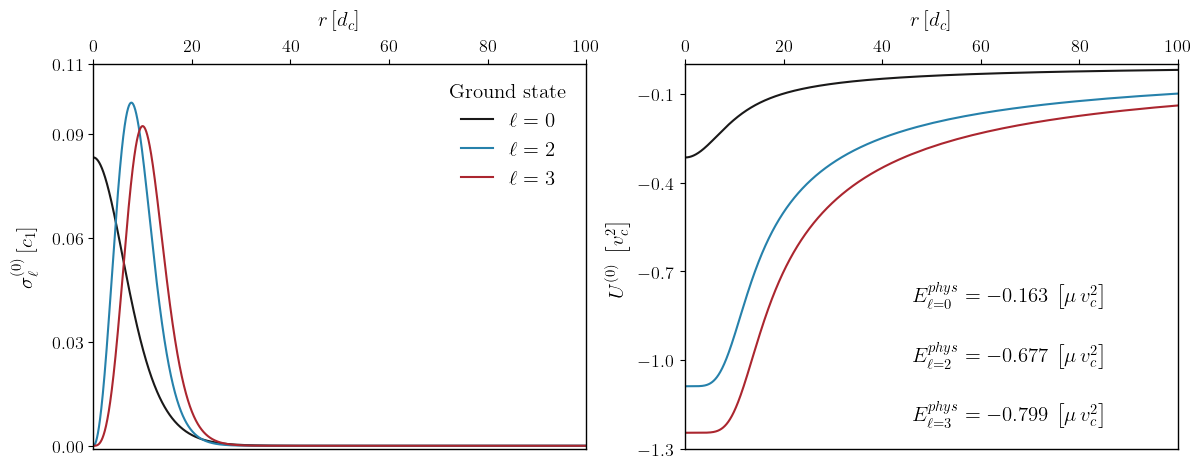

In [17]:
ellD = [0, 2, 3]
xND = [xN0, xN2, xN3]
sND = [sN0, sN2, sN3]
enVecD = [enVec0[0], enVec2[0], enVec3[0]]
uND = [uN0, uN2, uN3]

col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f', '#bc92e0', '#486318', '#ed5b0c', 
      '#f0a092', '#484f07', '#694d0c']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5.),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0, wspace=0.2) # espacio vertical y horizontal entre los subplots
                      ) 

for i in range(3):
    ax[0].plot(xND[i], sND[i], ls='-', lw=1.5, c=col[ellD[i]], label=r'$\ell=%2d$'%ellD[i])

ax[0].legend(frameon=False, title=r'Ground state', ncol=1, columnspacing=1.2, title_fontsize=15)
ax[0].set_ylabel(r'$\sigma^{(0)}_{\ell}\,[c_1]$', labelpad=10)

####

for i in range(3):
     ax[1].plot(xND[i], enVecD[i]-2*uND[i], ls='-', lw=1.5, c=col[ellD[i]], label=r'$\ell=%2d$'%ellD[i]) 

#ax[1].legend(frameon=False, title=r'ground states')
ax[1].set_ylabel(r'$U^{(0)} \;\left[v_c^2\right]$', labelpad=6)

######
ax[0].set_xlabel(r'$r\,[d_c]$', labelpad=10)
ax[0].xaxis.set_label_position('top') 
ax[1].set_xlabel(r'$r\,[d_c]$', labelpad=10)
ax[1].xaxis.set_label_position('top') 

ax[0].set_ylim(-0.001, 0.11)
ax[1].set_ylim(-1.3, -0.001)

ax[0].set_xlim(-0.1, 100)
ax[1].set_xlim(-0.1, 100)
#ax[1].set_xticks([])
ax[0].xaxis.tick_top()
ax[1].xaxis.tick_top()

#ax[0].spines[['bottom']].set_visible(False)
#ax[1].spines[['top']].set_visible(False)

ax[0].set_yticks([0.0, 0.03, 0.06, 0.09, 0.11])
ax[1].set_yticks([-1.3, -1.0, -0.7, -0.4, -0.1])

ax[1].text(x=46, y=-0.8, s=r'$E^{phys}_{\ell=%d}=%5.3f \,\left[\mu\, v_c^2\right]$'%(ellD[0], enVecD[0]), fontsize=15)
ax[1].text(x=46, y=-1., s=r'$E^{phys}_{\ell=%d}=%5.3f \,\left[\mu\, v_c^2\right]$'%(ellD[1], enVecD[1]), fontsize=15)
ax[1].text(x=46, y=-1.2, s=r'$E^{phys}_{\ell=%d}=%5.3f \,\left[\mu\, v_c^2\right]$'%(ellD[2], enVecD[2]), fontsize=15)

In [18]:
fig.savefig('Fig2v2.eps', format='eps', #metadata=None, # dpi='figure',
        pad_inches=0.0 , #0.1,
        facecolor='auto', edgecolor='auto',
        backend=None, dpi=1000, 
        bbox_inches='tight'# Plot will be occupy a maximum of available space # bbox_inches=None,
       )